In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd 
my_dict={'sale_id':[1,2,3,4,5,6,7,8,9],
         'c_id':[2,2,1,4,2,3,2,3,2],
         'p_id':[3,4,3,2,3,3,2,2,3],
	 'product':['Monitor','CPU','Monitor','RAM','Monitor','Monitor','RAM','RAM','Monitor'],
         'qty':[5,1,3,2,3,2,3,2,2],
         'store':['ABC','DEF','ABC','DEF','ABC','DEF','ABC','DEF','DEF']}
sales = pd.DataFrame(data=my_dict)
sales

,sale_id,c_id,p_id,product,qty,store
0,1,2,3,Monitor,5,ABC
1,2,2,4,CPU,1,DEF
2,3,1,3,Monitor,3,ABC
3,4,4,2,RAM,2,DEF
4,5,2,3,Monitor,3,ABC
5,6,3,3,Monitor,2,DEF
6,7,2,2,RAM,3,ABC
7,8,3,2,RAM,2,DEF
8,9,2,3,Monitor,2,DEF


In [3]:
import pandas as pd 
my_dict={'p_id':[1,2,3,4,5,6,7,8],
  'product':['Hard Disk','RAM','Monitor','CPU','Keyboard','Mouse','Motherboard','Power supply'],
  'price':[80,90,75,70,20,10,65,20]}
product = pd.DataFrame(data=my_dict)
product

,p_id,product,price
0,1,Hard Disk,80
1,2,RAM,90
2,3,Monitor,75
3,4,CPU,70
4,5,Keyboard,20
5,6,Mouse,10
6,7,Motherboard,65
7,8,Power supply,20


In [4]:
import pandas as pd 
my_dict={'c_id':[1,2,3,4,5,6,7,8],
         'Customer':['Rabi','Raju','Alex','Rani','King','Ronn','Jem','Tom']}
customer = pd.DataFrame(data=my_dict)
customer


,c_id,Customer
0,1,Rabi
1,2,Raju
2,3,Alex
3,4,Rani
4,5,King
5,6,Ronn
6,7,Jem
7,8,Tom


In [5]:
#List of products sold

In [6]:
sales

,sale_id,c_id,p_id,product,qty,store
0,1,2,3,Monitor,5,ABC
1,2,2,4,CPU,1,DEF
2,3,1,3,Monitor,3,ABC
3,4,4,2,RAM,2,DEF
4,5,2,3,Monitor,3,ABC
5,6,3,3,Monitor,2,DEF
6,7,2,2,RAM,3,ABC
7,8,3,2,RAM,2,DEF
8,9,2,3,Monitor,2,DEF


In [7]:
# List of quantity sold against each products

In [8]:
sales.groupby(['product'])[['qty']].sum()

,qty
product,
CPU,1
Monitor,15
RAM,7


In [9]:
# List of quantity and total sales($) against each product

In [10]:
import pandas as pd 
my_sale=sales.groupby(['product','p_id', 'store'])[['qty']].sum()
print(my_sale)
my_sum=pd.merge(my_sale,product,on='p_id')
print(my_sum)
my_sum['total_sale']=my_sum['qty']*my_sum['price']
my_sum

                    qty
product p_id store     
CPU     4    DEF      1
Monitor 3    ABC     11
             DEF      4
RAM     2    ABC      3
             DEF      4
   p_id  qty  product  price
0     4    1      CPU     70
1     3   11  Monitor     75
2     3    4  Monitor     75
3     2    3      RAM     90
4     2    4      RAM     90


,p_id,qty,product,price,total_sale
0,4,1,CPU,70,70
1,3,11,Monitor,75,825
2,3,4,Monitor,75,300
3,2,3,RAM,90,270
4,2,4,RAM,90,360


In [11]:
import pandas as pd 
my_sale=sales.groupby(['product'])[['qty']].sum()
print(my_sale)
my_sum=pd.merge(my_sale,product,on='product')
print(my_sum)
my_sum['total_sale']=my_sum['qty']*my_sum['price']
my_sum

         qty
product     
CPU        1
Monitor   15
RAM        7
   product  qty  p_id  price
0      CPU    1     4     70
1  Monitor   15     3     75
2      RAM    7     2     90


,product,qty,p_id,price,total_sale
0,CPU,1,4,70,70
1,Monitor,15,3,75,1125
2,RAM,7,2,90,630


In [12]:
# List of quantity sold against each product and against each store.

In [13]:
sales.groupby(['product','p_id','store'])[['qty']].sum()

qty
product p_id store     
CPU     4    DEF      1
Monitor 3    ABC     11
             DEF      4
RAM     2    ABC      3
             DEF      4

In [14]:
# List of products which are not sold

In [15]:
p_sold = set(sales['product'])
p_sold

{'CPU', 'Monitor', 'RAM'}

In [16]:
sales['product']

0    Monitor
1        CPU
2    Monitor
3        RAM
4    Monitor
5    Monitor
6        RAM
7        RAM
8    Monitor
Name: product, dtype: object

In [21]:
p_not_sold = set(product['product']) - p_sold
p_not_sold

{'Hard Disk', 'Keyboard', 'Motherboard', 'Mouse', 'Power supply'}

In [22]:
# List of customers who have not purchased any product.

In [23]:
my_data=pd.merge(sales,customer,on='c_id')
my_data

,sale_id,c_id,p_id,product,qty,store,Customer
0,1,2,3,Monitor,5,ABC,Raju
1,2,2,4,CPU,1,DEF,Raju
2,5,2,3,Monitor,3,ABC,Raju
3,7,2,2,RAM,3,ABC,Raju
4,9,2,3,Monitor,2,DEF,Raju
5,3,1,3,Monitor,3,ABC,Rabi
6,4,4,2,RAM,2,DEF,Rani
7,6,3,3,Monitor,2,DEF,Alex
8,8,3,2,RAM,2,DEF,Alex


In [20]:
set(customer.Customer) - set(my_data.Customer) 

{'Jem', 'King', 'Ronn', 'Tom'}

In [130]:
# who spends the most

In [28]:
my_data2 = pd.merge(my_data, product, on='product')
my_data2

,sale_id,c_id,p_id_x,product,qty,store,Customer,p_id_y,price
0,1,2,3,Monitor,5,ABC,Raju,3,75
1,5,2,3,Monitor,3,ABC,Raju,3,75
2,9,2,3,Monitor,2,DEF,Raju,3,75
3,3,1,3,Monitor,3,ABC,Rabi,3,75
4,6,3,3,Monitor,2,DEF,Alex,3,75
5,2,2,4,CPU,1,DEF,Raju,4,70
6,7,2,2,RAM,3,ABC,Raju,2,90
7,4,4,2,RAM,2,DEF,Rani,2,90
8,8,3,2,RAM,2,DEF,Alex,2,90


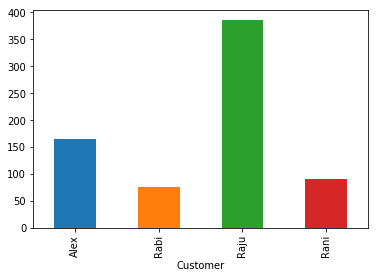

In [29]:
my_data2.groupby('Customer')['price'].sum().plot.bar()

In [133]:
#busiest store? (ny qty)

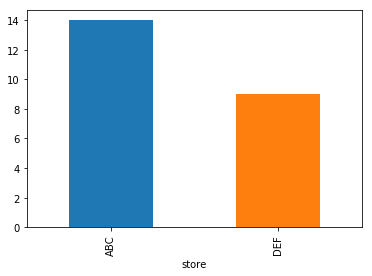

In [134]:
#abusing groupby
my_data2.groupby('store')['qty'].sum().plot.bar()

In [135]:
#busiest store? (by visits)

In [136]:
my_data2.store.value_counts()

DEF    5
ABC    4
Name: store, dtype: int64

In [137]:
#kde of priducts in store

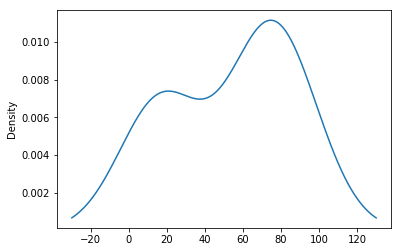

In [141]:
product.price.plot.kde()

In [ ]:
#read sales records csv and do basic pandas explrtion

In [48]:
df = pd.read_csv('Sales Records.csv')

In [49]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,957081544,01/11/2014,552,255.28,159.42,140914.56,87999.84,52914.72
1,Central America and the Caribbean,Panama,Snacks,Offline,C,07/05/2010,301644504,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38
2,Europe,Czech Republic,Beverages,Offline,C,09/12/2011,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48
3,Asia,North Korea,Cereal,Offline,L,5/13/2010,892599952,6/15/2010,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,7/20/2015,571902596,7/27/2015,7542,152.58,97.44,1150758.36,734892.48,415865.88


In [50]:
df.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
Region            5000 non-null object
Country           5000 non-null object
Item Type         5000 non-null object
Sales Channel     5000 non-null object
Order Priority    5000 non-null object
Order Date        5000 non-null object
Order ID          5000 non-null int64
Ship Date         5000 non-null object
Units Sold        5000 non-null int64
Unit Price        5000 non-null float64
Unit Cost         5000 non-null float64
Total Revenue     5000 non-null float64
Total Cost        5000 non-null float64
Total Profit      5000 non-null float64
dtypes: float64(5), int64(2), object(7)
memory usage: 547.0+ KB


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order ID,5000.0,5.486447e+08,2.594671e+08,1.000909e+08,3.201042e+08,5.523150e+08,7.687709e+08,9.998797e+08
Units Sold,5000.0,5.030698e+03,2.914515e+03,2.000000e+00,2.453000e+03,5.123000e+03,7.576250e+03,9.999000e+03
Unit Price,5000.0,2.657456e+02,2.187167e+02,9.330000e+00,8.173000e+01,1.540600e+02,4.372000e+02,6.682700e+02
Unit Cost,5000.0,1.874941e+02,1.764163e+02,6.920000e+00,3.584000e+01,9.744000e+01,2.633300e+02,5.249600e+02
Total Revenue,5000.0,1.325738e+06,1.475375e+06,6.531000e+01,2.574168e+05,7.794095e+05,1.839975e+06,6.672676e+06
Total Cost,5000.0,9.330932e+05,1.150873e+06,4.844000e+01,1.547480e+05,4.681807e+05,1.189578e+06,5.248025e+06
Total Profit,5000.0,3.926446e+05,3.829351e+05,1.687000e+01,8.533925e+04,2.790952e+05,5.651064e+05,1.726007e+06


In [53]:
#replace column names having space with _

In [54]:
df.columns = df.columns.str.replace(" ", "_")

In [55]:
df.head(2)

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,957081544,01/11/2014,552,255.28,159.42,140914.56,87999.84,52914.72
1,Central America and the Caribbean,Panama,Snacks,Offline,C,07/05/2010,301644504,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38


In [56]:
#best profitable item type(% of profit per item)

In [57]:
df.Item_Type.unique()

array(['Baby Food', 'Snacks', 'Beverages', 'Cereal', 'Personal Care',
       'Clothes', 'Office Supplies', 'Cosmetics', 'Meat', 'Fruits',
       'Vegetables', 'Household'], dtype=object)

In [58]:
df['profit'] = 100*(df.Unit_Price/df.Unit_Cost-1)

In [59]:
df.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit,profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,957081544,01/11/2014,552,255.28,159.42,140914.56,87999.84,52914.72,60.130473
1,Central America and the Caribbean,Panama,Snacks,Offline,C,07/05/2010,301644504,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38,56.588670
2,Europe,Czech Republic,Beverages,Offline,C,09/12/2011,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48,49.260774
3,Asia,North Korea,Cereal,Offline,L,5/13/2010,892599952,6/15/2010,9016,205.70,117.11,1854591.20,1055863.76,798727.44,75.646828
4,Asia,Sri Lanka,Snacks,Offline,C,7/20/2015,571902596,7/27/2015,7542,152.58,97.44,1150758.36,734892.48,415865.88,56.588670


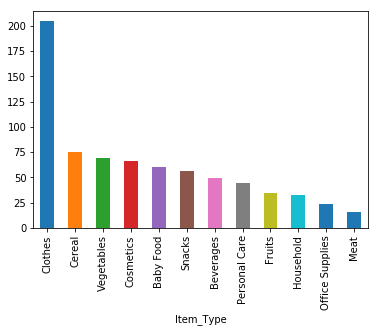

In [62]:
df.groupby('Item_Type')['profit'].mean().sort_values(ascending = False).plot.bar()

In [178]:
# and in which Region is the highest profit?

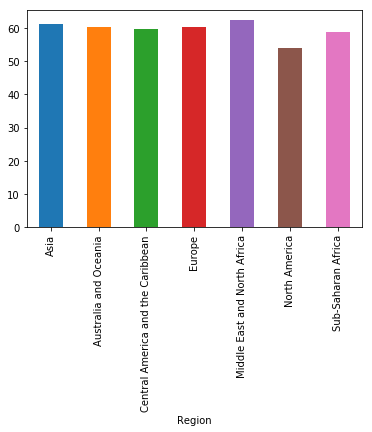

In [181]:
df.groupby('Region')['profit'].mean().plot.bar()

In [183]:
df.Region.unique()

array(['Central America and the Caribbean', 'Europe', 'Asia',
       'Middle East and North Africa', 'Australia and Oceania',
       'Sub-Saharan Africa', 'North America'], dtype=object)

In [184]:
# in which region buying more online?

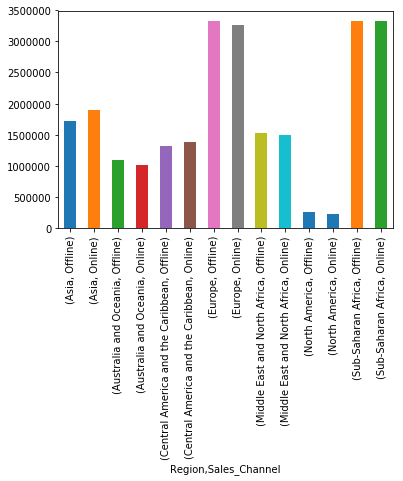

In [195]:
df.groupby(['Region','Sales_Channel'])['Units_Sold'].sum().plot.bar()

In [72]:
df.groupby(['Sales_Channel','Region'])['Units_Sold'].sum().sort_values(ascending=False).unstack().T

Sales_Channel,Offline,Online
Region,,
Asia,1721628,1898408
Australia and Oceania,1099518,1012268
Central America and the Caribbean,1315677,1383099
Europe,3326161,3256161
Middle East and North Africa,1525111,1488320
North America,259766,224994
Sub-Saharan Africa,3321730,3320650


In [198]:
#which year was most profitable? (try the two "options")

In [205]:
pd.to_datetime(df.Ship_Date.values)

DatetimeIndex(['2014-01-11', '2010-07-26', '2011-09-29', '2010-06-15',
               '2015-07-27', '2010-11-22', '2011-05-10', '2013-11-04',
               '2016-10-05', '2015-05-07',
               ...
               '2014-05-21', '2015-12-23', '2014-08-30', '2012-06-03',
               '2012-06-23', '2015-04-20', '2014-10-02', '2016-12-10',
               '2014-05-11', '2011-08-07'],
              dtype='datetime64[ns]', length=5000, freq=None)

In [208]:
df['year_ship'] = pd.to_datetime(df.Ship_Date.values).year
df.year_ship.head()

0    2014
1    2010
2    2011
3    2010
4    2015
Name: year, dtype: int64

In [209]:
df['year_order'] = pd.to_datetime(df.Order_Date.values).year
df.year_order.head()

0    2013
1    2010
2    2011
3    2010
4    2015
Name: year_order, dtype: int64

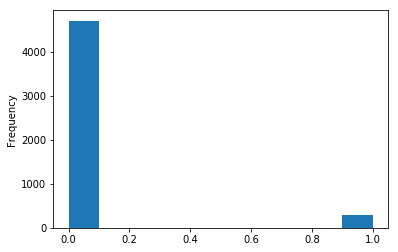

In [214]:
(df.year_ship - df.year_order).plot.hist()

In [217]:
(df.year_ship - df.year_order).sum()

289

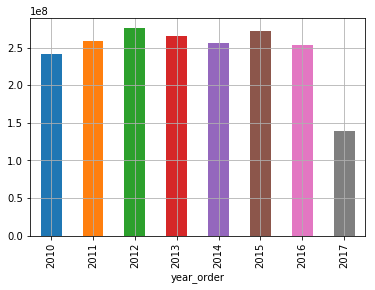

In [229]:
df.groupby('year_order')['Total_Profit'].sum().plot.bar(grid=True)

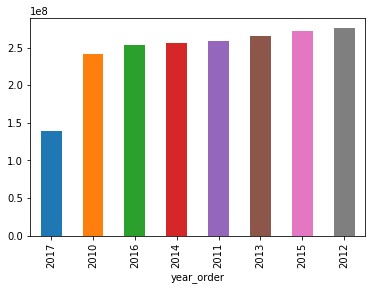

In [232]:
df2 = df.groupby('year_order')['Total_Profit'].sum().sort_values()
df2.plot.bar()

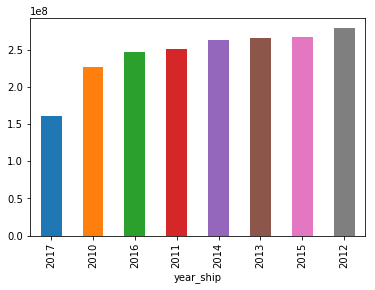

In [233]:
df3 = df.groupby('year_ship')['Total_Profit'].sum().sort_values()
df3.plot.bar()

In [245]:
(df3.index - df2.index)

Int64Index([0, 0, 0, -3, 3, 0, 0, 0], dtype='int64', name='year_ship')

In [249]:
my_filter = (df3.index - df2.index) != 0
my_filter

array([False, False, False,  True,  True, False, False, False])

In [251]:
df3.index[my_filter], df2.index[my_filter],

(Int64Index([2011, 2014], dtype='int64', name='year_ship'),
 Int64Index([2014, 2011], dtype='int64', name='year_order'))

In [ ]:
# now your turn - do some more analysis of your own